## Step1: Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [74]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## Step2: Loading Dataset

In [75]:
california_housing = fetch_california_housing()

In [76]:
X = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [77]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [78]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

## Step3: Selecting Features for Visualization

In [79]:
X=X[['MedInc','AveRooms']]

## Step4: Train-Test Split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Step5: Initializing and Training Model

In [81]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Step6: Making Predictions

In [82]:
y_pred = model.predict(X_test)

## Step7: Visualizing Best Fit Line in 3D

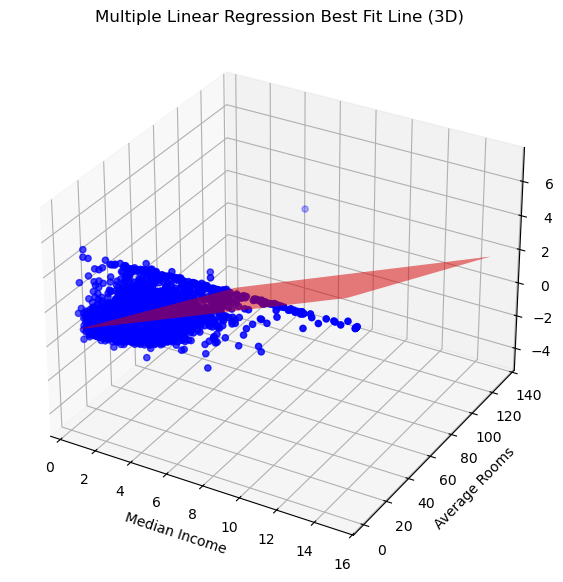

In [83]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

In [84]:
model.coef_

array([ 0.43626089, -0.04017161])

In [85]:
model.intercept_

np.float64(0.5972677793933276)

# Gradient Descent in Linear Regression

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

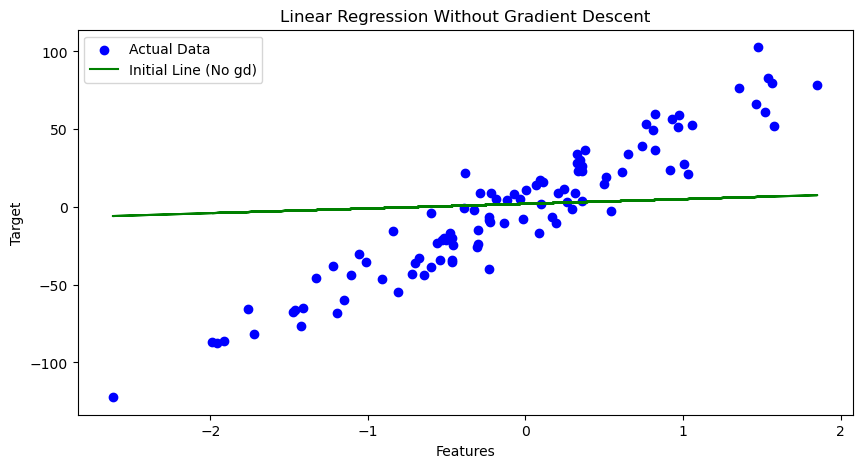

In [87]:
X,y = make_regression(n_samples=100,n_features=1,noise=15,random_state=42)
y = y.reshape(-1,1)
m = X.shape[0]

X_b = np.c_[np.ones((m,1)),X] # np.c_[] means “concatenate columns” in NumPy

theta = np.array([[2.0],[3.0]])

plt.figure(figsize=(10,5))
plt.scatter(X,y,color='blue',label='Actual Data')
plt.plot(X,X_b.dot(theta),color='green',label='Initial Line (No gd)') 
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression Without Gradient Descent')
plt.legend()
plt.show()

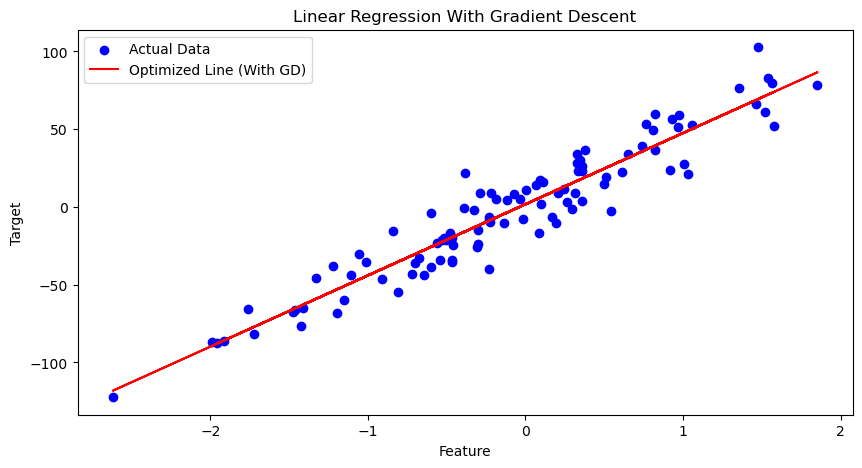

In [88]:
lr = 0.1
n_iterations = 100
for _ in range(n_iterations):
    y_pred = X_b.dot(theta) # X_b.dot(theta) means ŷ = Xb × θ
    gradients = (2/m) * X_b.T.dot(y_pred - y)
    """" We minimize the Mean Squared Error (MSE): 
                                        J(θ) = (1/m)∑(ŷ−y)²
         The gradient (partial derivatives) of J with respect to θ is:
                                        ∇θ​J=(2/m)X(ŷ−y)"""

    theta -=lr*gradients
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="red", label="Optimized Line (With GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.show()

In [89]:
from sklearn.datasets import load_iris
iris = load_iris()

In [90]:
X = iris.data
y = iris.target

In [91]:
features_names = iris.feature_names
target_names = iris.target_names

In [92]:
features_names,target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [93]:
type(X)

numpy.ndarray

In [94]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [96]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((90, 4), (90,), (60, 4), (60,))

## Handling Categorical Data

In [97]:
# 1.Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_features = ['cat','dog','cat','dog','bird']
encoder = LabelEncoder()
encoded_features = encoder.fit_transform(categorical_features)
encoded_features

array([1, 2, 1, 2, 0])

In [98]:
# 2.One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
categorical_features = np.array(categorical_features).reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(categorical_features)
encoded_features

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [99]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [100]:
y_pred = log_reg.predict(X_test)

In [101]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

In [102]:
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
preds = log_reg.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)

Predictions: [np.str_('setosa'), np.str_('virginica')]


# Rainfall prediction using Linear regression

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [104]:
data = pd.read_csv('Austin-2019-01-01-to-2023-07-22.csv')

In [105]:
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [106]:
features = ['tempmax','tempmin','humidity','dew']
target='precip'
data = data.dropna(subset=features+[target])

In [107]:
X=data[features]
y=data[target]

In [108]:
X.head()

,tempmax,tempmin,humidity,dew
0,45.1,39.4,79.6,36.6
1,40.3,36.2,90.2,35.1
2,51.8,34.7,82.6,35.6
3,65.9,32.5,64.8,32.9
4,73.7,37.5,58.6,35.5


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

In [112]:
mse = mean_squared_error(y_test,y_pred)
mse

0.049747708518265

In [113]:
np.sqrt(mse)

np.float64(0.2230419434058648)

In [114]:
r2_score(y_test,y_pred)

0.16619844427894748

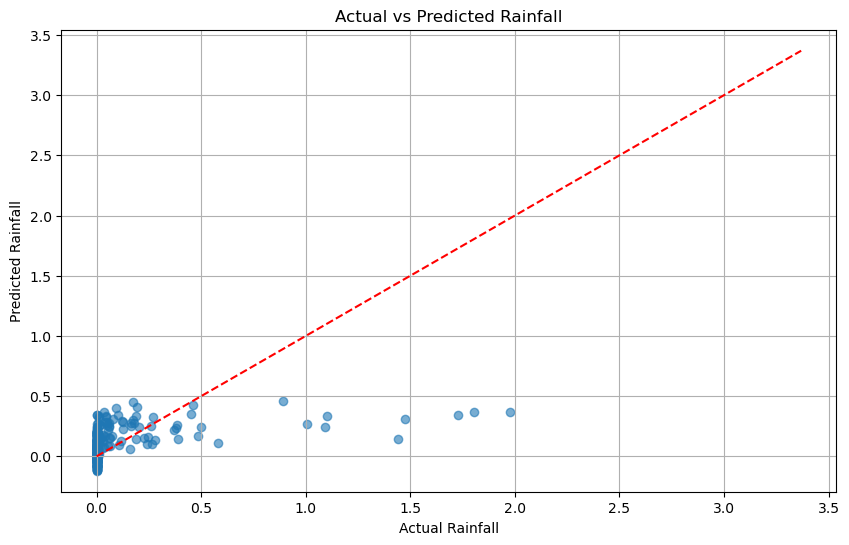

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

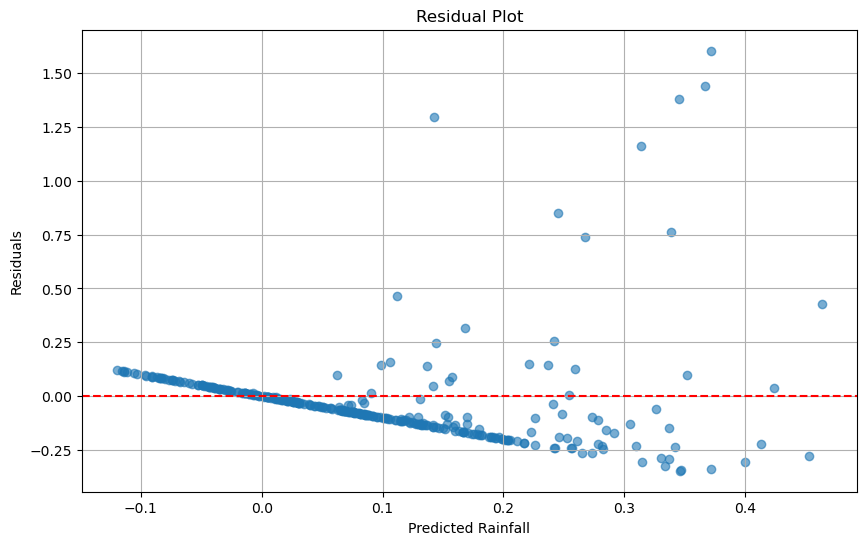

In [116]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()

## Variance_inflation_Factor

In [117]:
df = pd.read_csv('BMI.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
X = df[['Gender','Height','Weight']]
vif_data = pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377
